<H2>
<B>TOPIC    :</B> EXPLORATORY DATA ANALYSIS on FACEBOOK DATA <br>

<B><CENTER>MARKETING ANALYTICS</CENTER></B>

##<b>Importing the packages</b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats

##<b>Load the data set</b>

In [ ]:
data= pd.read_csv('/content/pseudo_facebook.csv')
data

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [ ]:
data.shape

(99003, 15)

##<b>Handling the missing values</b>

In [ ]:
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

We have the 175 null values in the gender column and 2 null values in the tenure column. We have 99003 records with 15 attributes. So, by droping the 177 null values will not effect the pattern. So, I am dropping the null values in the present data set. 

In [ ]:
data=data.dropna()
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

After dropping the values there are no null values. 

##<b>Checking the categorical values in the data</b>

In [ ]:
categorical=[col for col in data.columns if data[col].dtype=='object']
for i,j in enumerate(categorical):
    print("{0}: {1} has the unique elements:{2}".format(i+1,j,data[j].unique()))

1: gender has the unique elements:['male' 'female']


So, we have only one categorical column value, in the given data set.

##<b>Adding a column  that will classify people in different age groups<b>

In [ ]:
labels=['13-19','20-34','35-49','50-65','over 65']
data['age_group']=pd.cut(data.age,bins=[12,19,34,49,65,data.age.max()],labels=labels,include_lowest=True)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,13-19
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,13-19
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,13-19
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,13-19
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,13-19


##<b>EXPLORATORY DATA ANAYSIS</b>

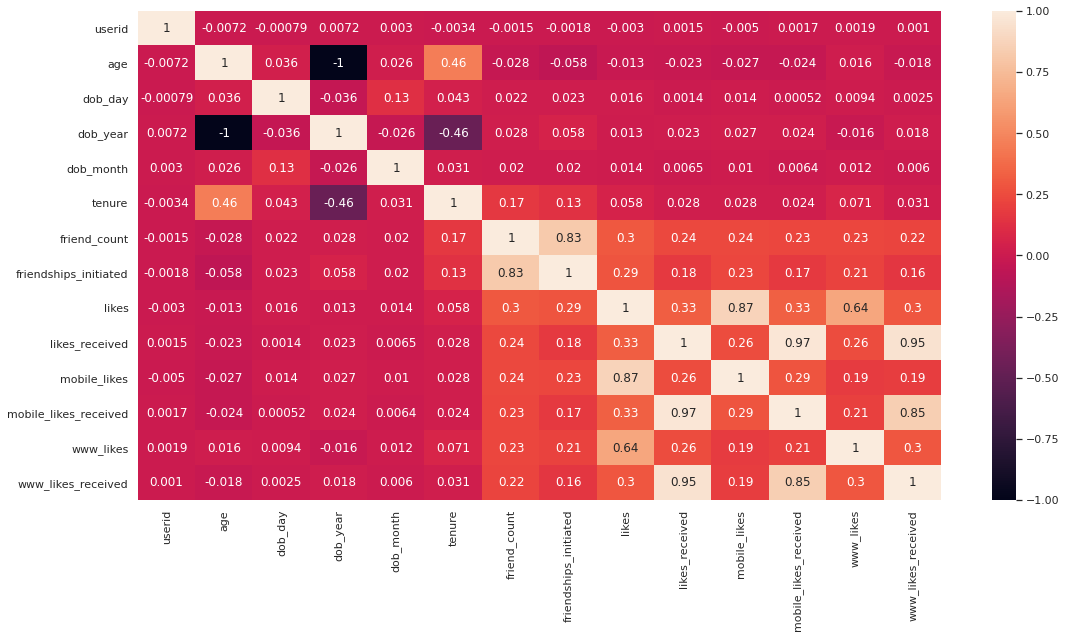

In [ ]:
sns.heatmap(data.corr('pearson'),annot=True)

Ffriend count of the ppl who initiated friend request is more correlated and the mobile likes are positively correlated to the site likes.

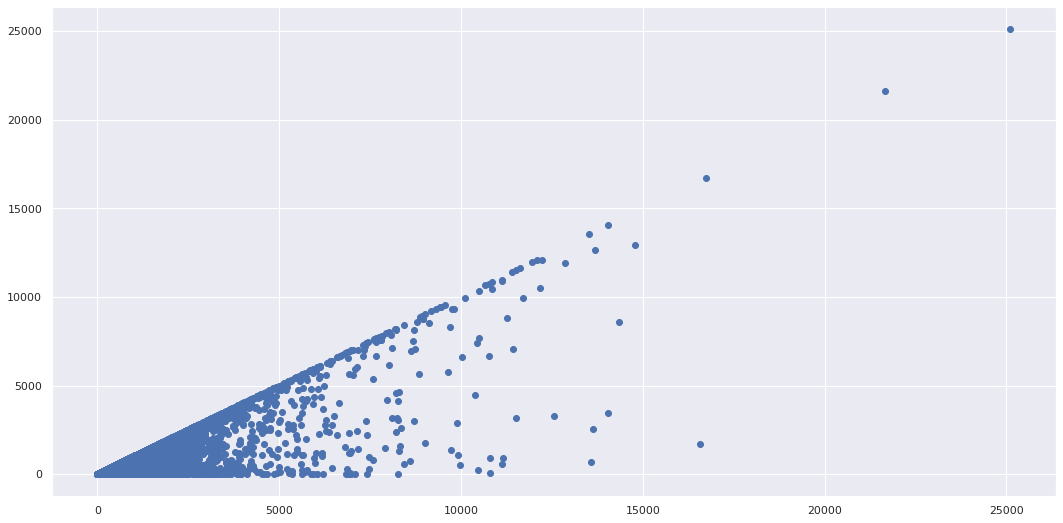

In [ ]:
plt.scatter(data['likes'],data['mobile_likes'])

GENDER

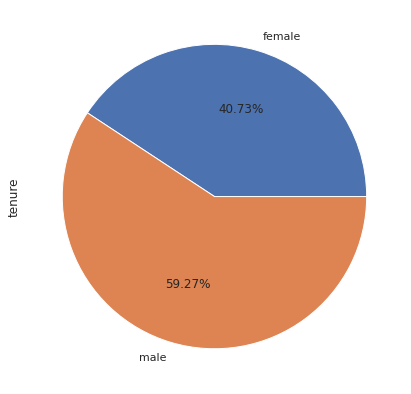

In [ ]:
gender_no=data.groupby("gender")["tenure"].count()
fig,ax=plt.subplots(figsize=(13,7))
gender_no.plot.pie(ax=ax,autopct='%0.2f%%') #autopct cacluate the percentage value automatically

The male tenure is more than the female tenure. Implies that the male are more likely to retain as the facebook customers. 

**AGE** **DISTRIBUTION**

Text(0.5, 1.0, 'Age Distribution of Facebook Users')

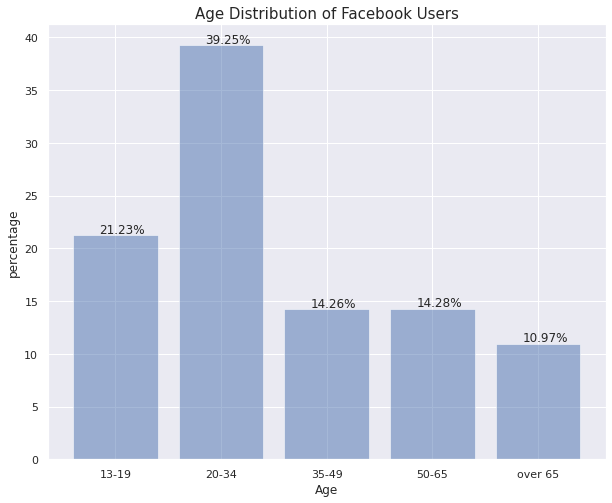

In [ ]:
sns.set()
fig,ax=plt.subplots(figsize=(10,8))
test=data.groupby("age_group")["tenure"].count()
test=test/sum(test)*100
ax.bar(test.index,test.values,alpha=0.5)
for i in ax.patches:
    ax.text(i.get_x()+0.25,i.get_height()+0.2,str(round(i.get_height(),2))+'%')
ax.set_xlabel("Age")
ax.set_ylabel("percentage")
ax.set_title("Age Distribution of Facebook Users",fontsize=15)

The people between the age group 20-30 are more likely to use facebook. The people between the age groups 13-19 are next addicted users of facebook. The people with age 3-65 use facebook at same pace. Very less ratio of people at with age >65 use facebook. 

<b>AGE AND GENDER DISTRIBUTION</b> 

Text(0.5, 1.0, 'Age and Gender Distribution of Facebook Users')

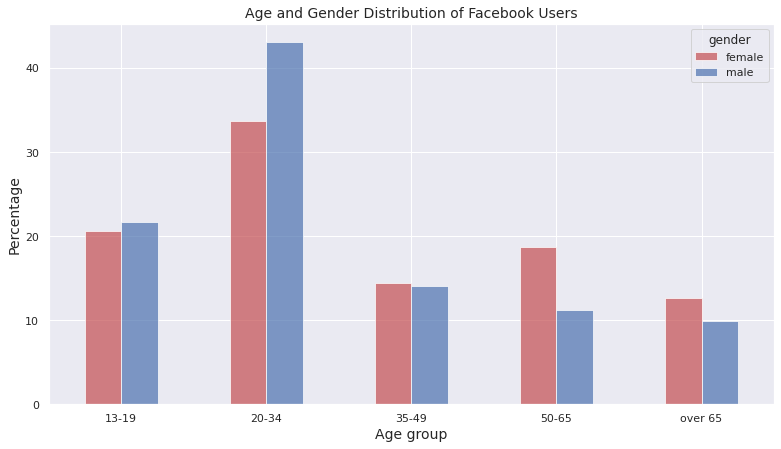

In [ ]:
fig,ax=plt.subplots(figsize=(13,7))
color=['r','b']
test=data.pivot_table('tenure',index='age_group',columns='gender',aggfunc='count')
#conversion into percenatage
for col in test.columns:
    test[col]=test[col]/sum(test[col])*100
test.plot(kind='bar',color=color,ax=ax,alpha=0.7)
ax.set_xticklabels(test.index,rotation=360)
ax.set_xlabel("Age group",fontsize=14)
ax.set_ylabel("Percentage",fontsize=14)
ax.set_title('Age and Gender Distribution of Facebook Users',fontsize=14)

We can see that the majority of users are disproportionately aged between 20 and 34, accounting for 36% of the total users followed by teenagers comprising 25 %. The very next chart shows that the data is sorted out by gender and age_group. As with the previous result, the heavy users of the platform are still those between 20 and mid 30 with males reaching almost 40%. One interest thing catching our attention is that more than half of the usage rate in the group from 20 to mid 30 is the rate of the following group. This pronounced fall gives facebook a valuable lesson; come out with a aggressive marketing targeted at those over 35.

<b>Do men or women have longer tenure on Facebook?</b>

In [ ]:
pd.DataFrame(data.groupby("gender")["tenure"].mean()).reset_index().rename(columns={"tenure":"average tenure on FB"})

,gender,average tenure on FB
0,female,587.229231
1,male,500.204391


Compare to women, men stay as active facebook users. But the difference in their ratio is less.  

<b>Do men or women have more friends on Facebook?</b>

In [ ]:
pd.DataFrame(data.groupby("gender")["friend_count"].mean()).rename(columns={"friend_count":"average friend count"}).reset_index()

,gender,average friend count
0,female,241.977368
1,male,165.035459


The women tendss to have more friends in facebook, compared to men. So, though the tenure of women is less they are more interactive when they are using the facebook. 

<b>Are men or women more likely to initiate friend request?</b>

In [ ]:
pd.DataFrame(data.groupby("gender")["friendships_initiated"].mean()).rename(columns={"friendships_initiated":"average friendship request initiated"}).reset_index()

,gender,average friendship request initiated
0,female,113.90244
1,male,103.06660


The women are more likely to intiate the friend request, implies they are more friendly and interactive. 

<b>Which gender, male or female, is more likely to receive a "like" from other people?</b>

In [ ]:
received=data[["likes_received"]]
pd.DataFrame(data.groupby("gender")["likes_received"].mean())

,likes_received
gender,
female,251.445965
male,67.911548


The women posts are filled with more likes compared to men post. 

<b>Which gender, male or female, is more likely to access their Facebook account from a mobile device?</b>

In [ ]:
mobilelikes=data[["mobile_likes"]]
pd.DataFrame(data.groupby("gender")["mobile_likes"].mean())

,mobile_likes
gender,
female,172.921097
male,60.261328


The females are more likely to use the Facebook through phone. So, the FaceBook can present the ads and posts related to phones, so that they can occupy the women time more on their page. 

<h2><b>INFERENCE:</B><BR>

<h3>

1. The male tenure is more than the female tenure. Implies that the male are more likely to retain as the facebook customers. 

2. The people between the age group 20-30 are more likely to use facebook. The people between the age groups 13-19 are next addicted users of facebook. The people with age 3-65 use facebook at same pace. Very less ratio of people at with age >65 use facebook. 

3. We can see that the majority of users are disproportionately aged between 20 and 34, accounting for 36% of the total users followed by teenagers comprising 25 %. The very next chart shows that the data is sorted out by gender and age_group. As with the previous result, the heavy users of the platform are still those between 20 and mid 30 with males reaching almost 40%. One interest thing catching our attention is that more than half of the usage rate in the group from 20 to mid 30 is the rate of the following group. <i><b>This pronounced fall gives facebook a valuable lesson; come out with a aggressive marketing targeted at those over 35.</i></b>

4. Compare to women, men stay as active facebook users. But the difference in their ratio is less. So, the facebook but try to spread the content that makes women also more active wich increases their tenure rate.

5. The women tendss to have more friends in facebook, compared to men. So, though the tenure of women is less they are more interactive when they are using the facebook. 

6. The women are more likely to intiate the friend request, implies they are more friendly and interactive. 

7. The women posts are filled with more likes compared to men post. The users are more active on women postings

8. The females are more likely to use the Facebook through phone. So, the FaceBook can present the ads and posts related to phones, so that they can occupy the women time more on their page. 

</h3>